<a href="https://colab.research.google.com/github/Hilal-Alparslan/README/blob/main/6_Hafta_%C3%96dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Veri Setini inceleme:

Gerekli kütüphaneler

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


Veri Seti Yapay Olusturulmasi

In [4]:
# Rastgele veri üretme
np.random.seed(42)
N = 300

# Takipçi sayısı
followers_real = np.random.normal(loc=1500, scale=800, size=int(N*0.6))
followers_fake = np.random.normal(loc=150, scale=100, size=int(N*0.4))
followers = np.concatenate([followers_real, followers_fake])

# Gönderi etkileşimi
engagement_real = np.random.normal(loc=350, scale=150, size=int(N*0.6))
engagement_fake = np.random.normal(loc=5, scale=5, size=int(N*0.4))
engagement = np.concatenate([engagement_real, engagement_fake])

# Hesap yaşı
age_real = np.random.randint(low=300, high=1500, size=int(N*0.6))
age_fake = np.random.randint(low=1, high=180, size=int(N*0.4))
age = np.concatenate([age_real, age_fake])

# Label: 1=Gerçek, 0=Sahte
labels = np.concatenate([np.ones(int(N*0.6)), np.zeros(int(N*0.4))])

# DataFrame
data = pd.DataFrame({
    'Takipçi Sayısı': followers.clip(min=1),
    'Gönderi Etkileşimi': engagement.clip(min=0),
    'Hesap Yaşı (Gün sayısı)': age,
    'Hedef (0=Sahte, 1=Gerçek)': labels
})

# Shuffle
data = data.sample(frac=1).reset_index(drop=True)

data.head()


,Takipçi Sayısı,Gönderi Etkileşimi,Hesap Yaşı (Gün sayısı),"Hedef (0=Sahte, 1=Gerçek)"
0,101.463645,5.496662,98,0.0
1,1759.267176,396.636135,1460,1.0
2,2662.827262,396.687523,427,1.0
3,313.241130,0.000000,39,0.0
4,326.545424,6.855729,150,0.0


Ham Veri Görsellestirmesi

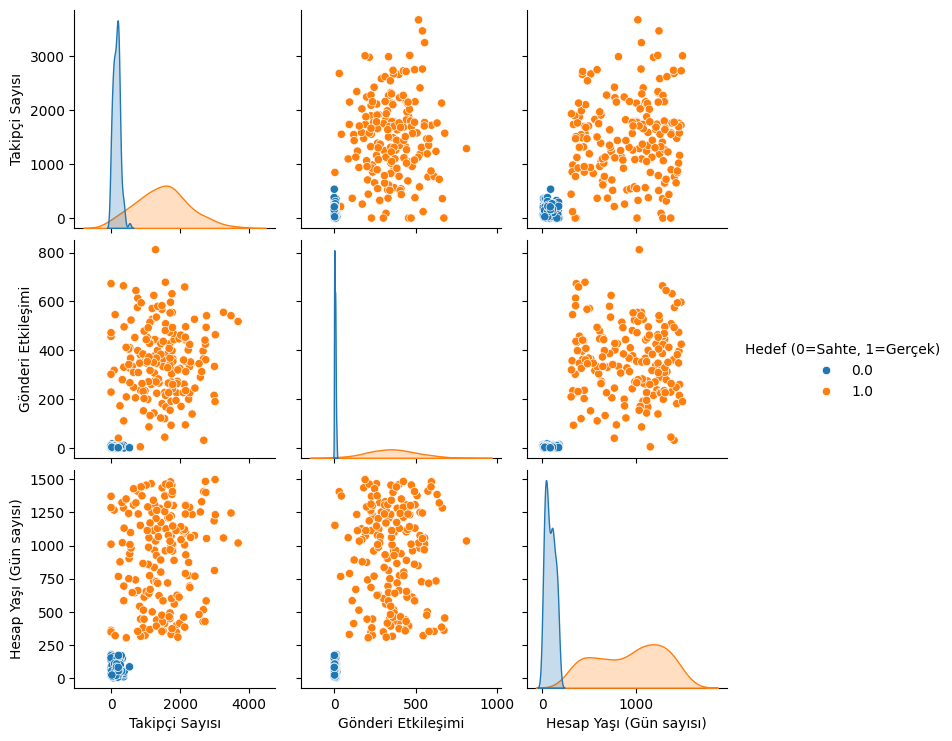

In [5]:
sns.pairplot(data, hue='Hedef (0=Sahte, 1=Gerçek)')
plt.show()


Egitim Ve Test Verisi Ayirma

In [7]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Modelleri Tanimlama Ve Egitim

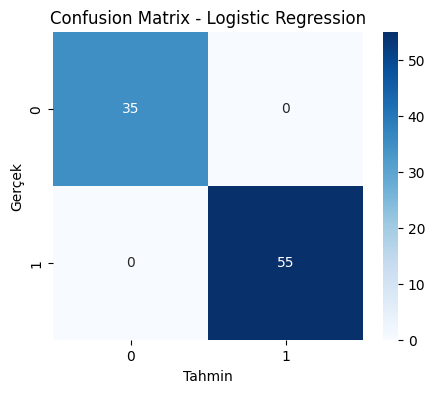

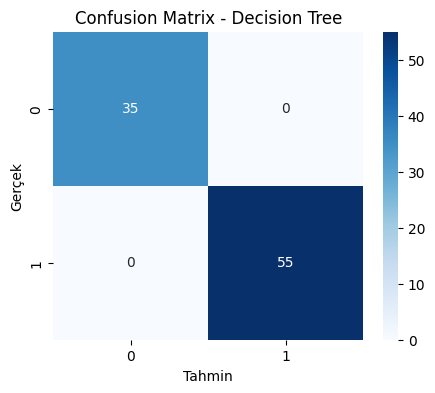

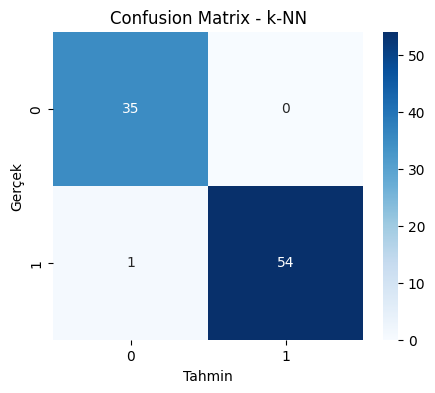

In [8]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "k-NN": KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1-score": f1}

    # Confusion Matrix görselleştirme
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Tahmin")
    plt.ylabel("Gerçek")
    plt.show()


Sonuclari KArsilastirma

In [9]:
pd.DataFrame(results).T


,Accuracy,Precision,Recall,F1-score
Logistic Regression,1.000000,1.0,1.000000,1.000000
Decision Tree,1.000000,1.0,1.000000,1.000000
k-NN,0.988889,1.0,0.981818,0.990826


Gercek Ve Tahmin Görsellestirme

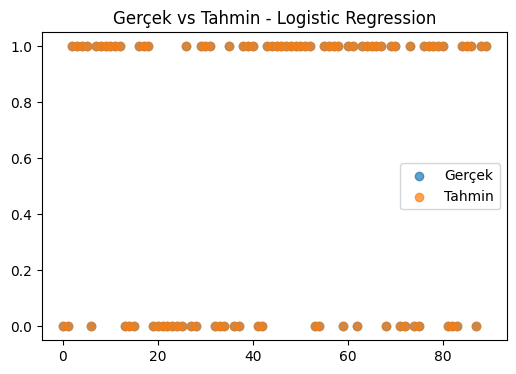

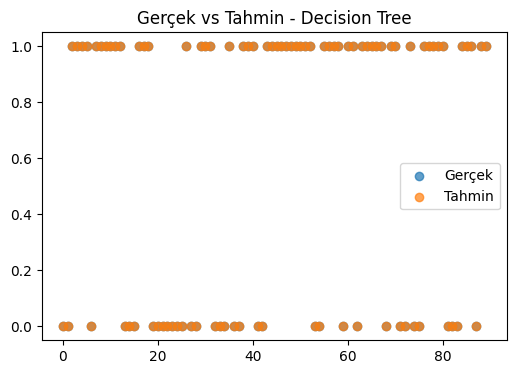

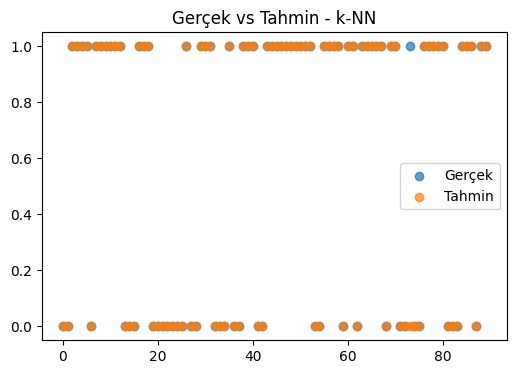

In [10]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.figure(figsize=(6,4))
    plt.scatter(range(len(y_test)), y_test, label="Gerçek", alpha=0.7)
    plt.scatter(range(len(y_pred)), y_pred, label="Tahmin", alpha=0.7)
    plt.title(f"Gerçek vs Tahmin - {name}")
    plt.legend()
    plt.show()


Sonuclarin Karsilastirmasi

In [11]:
for model, metrics in results.items():
    print(f"\nModel: {model}")
    for metric, value in metrics.items():
        if metric != "Confusion Matrix":
            print(f"{metric}: {value:.4f}")



Model: Logistic Regression
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Model: Decision Tree
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Model: k-NN
Accuracy: 0.9889
Precision: 1.0000
Recall: 0.9818
F1-score: 0.9908
